In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import plotly.express as px
import matplotlib.pyplot as plt
import sys
import seaborn
import smogn

sys.path.insert(0, "../../nagesh_kommuri/src")

import udf_eda as udf

pd.set_option("display.float_format", lambda x: "%.5f" % x)


In [2]:
df = pd.read_csv("../../../data/input/suanfarma_train_data_rules_round_6.csv")
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

df = df[df.columns.drop(list(df.filter(regex="_99")))]
df = df[df.columns.drop(list(df.filter(regex="_98")))]
df = df[df.columns.drop(list(df.filter(regex="_95")))]
df = df[df.columns.drop(list(df.filter(regex="_0")))]
df = df[df.columns.drop(list(df.filter(regex="_1")))]
df = df[df.columns.drop(list(df.filter(regex="_2")))]
df = df[df.columns.drop(list(df.filter(regex="_5")))]
df = df[df.columns.drop(list(df.filter(regex="_std")))]
df = df[df.columns.drop(list(df.filter(regex="_min")))]
df = df[df.columns.drop(list(df.filter(regex="_max")))]
df = df[df.columns.drop(list(df.filter(regex="_mean")))]
df = df[df.columns.drop(list(df.filter(regex="_75%")))]
df = df[df.columns.drop(list(df.filter(regex="_25%")))]
df = df[df.columns.drop(list(df.filter(regex="_50%")))]


In [3]:
df.head()


,result,101AI605_30,101AI605_40,101AI605_60,101AI605_70,101AI605_80,101AI605_90,101AI635_30,101AI635_40,101AI635_60,...,TI670_60,TI670_70,TI670_80,TI670_90,TI684_30,TI684_40,TI684_60,TI684_70,TI684_80,TI684_90
0,0.79592,6.19555,6.11504,6.09485,6.08360,6.12259,6.16637,5.16468,5.22581,5.25381,...,22.78916,23.02213,12.85038,0.00000,24.10828,24.22435,24.04648,24.15430,12.06991,0.00000
1,0.73886,3.88270,3.60501,3.97749,4.07015,4.16212,4.30865,5.18424,5.19480,5.22447,...,22.98308,22.99864,23.00281,0.00000,23.88470,24.10971,24.15411,24.19563,24.23189,0.00000
2,0.79727,5.23565,5.29581,5.33128,5.34920,5.37552,5.39450,5.19780,5.21787,5.22971,...,22.97750,23.00318,22.99955,47.73516,24.52174,24.48482,24.49361,24.51774,24.39658,24.34800
3,0.72822,5.43944,5.44094,5.47783,5.49470,5.50888,5.52923,5.18840,5.28134,5.31506,...,23.02571,23.00167,23.02075,0.00000,23.91874,24.00337,24.03361,24.02628,23.98199,0.00000
4,0.73557,5.63927,5.70158,5.61951,5.55752,5.16411,5.13150,5.35236,5.44962,5.10829,...,22.51039,18.29111,22.51448,0.00000,24.08220,24.02252,24.04671,24.09822,23.93077,0.00000


In [4]:
df = df[df.columns.drop(list(df.filter(regex="306TI")))]
df = df[df.columns.drop(list(df.filter(regex="306LI")))]
df = df[df.columns.drop(list(df.filter(regex="101LI")))]


In [5]:
df.columns


Index(['result', '101AI605_30', '101AI605_40', '101AI605_60', '101AI605_70',
       '101AI605_80', '101AI605_90', '101AI635_30', '101AI635_40',
       '101AI635_60',
       ...
       'TI670_60', 'TI670_70', 'TI670_80', 'TI670_90', 'TI684_30', 'TI684_40',
       'TI684_60', 'TI684_70', 'TI684_80', 'TI684_90'],
      dtype='object', length=451)

In [6]:
df.shape


(92, 451)

In [7]:
df.columns


Index(['result', '101AI605_30', '101AI605_40', '101AI605_60', '101AI605_70',
       '101AI605_80', '101AI605_90', '101AI635_30', '101AI635_40',
       '101AI635_60',
       ...
       'TI670_60', 'TI670_70', 'TI670_80', 'TI670_90', 'TI684_30', 'TI684_40',
       'TI684_60', 'TI684_70', 'TI684_80', 'TI684_90'],
      dtype='object', length=451)

In [8]:
## conduct smogn
df_smogn = smogn.smoter(
    data=df,
    y="result",
    k=7,  ## positive integer (k < n)
    samp_method="extreme",  ## string ('balance' or 'extreme'
    drop_na_col=True,  ## boolean (True or False)
    drop_na_row=True,  ## boolean (True or False)
    ## phi relevance argument
)
df.reset_index(inplace=True)
df_smogn.reset_index(inplace=True)


r_index: 100%|##########| 1/1 [00:00<00:00, 19.17it/s]


<AxesSubplot:xlabel='result', ylabel='Density'>

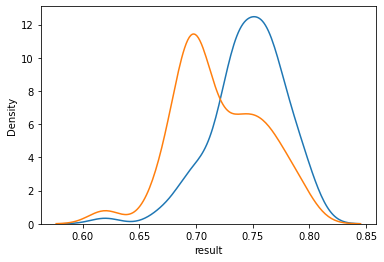

In [9]:
## plot y distribution
seaborn.kdeplot(
    df["result"],
    label="Original",
)
seaborn.kdeplot(
    df_smogn["result"],
    label="Modified",
)


In [10]:
df_smogn.shape


(143, 452)

In [11]:
list(df.columns[:])


['index',
 'result',
 '101AI605_30',
 '101AI605_40',
 '101AI605_60',
 '101AI605_70',
 '101AI605_80',
 '101AI605_90',
 '101AI635_30',
 '101AI635_40',
 '101AI635_60',
 '101AI635_70',
 '101AI635_80',
 '101AI635_90',
 '101TI607_30',
 '101TI607_40',
 '101TI607_60',
 '101TI607_70',
 '101TI607_80',
 '101TI607_90',
 '101TI637_30',
 '101TI637_40',
 '101TI637_60',
 '101TI637_70',
 '101TI637_80',
 '101TI637_90',
 '101WI610_30',
 '101WI610_40',
 '101WI610_60',
 '101WI610_70',
 '101WI610_80',
 '101WI610_90',
 '109FI616_30',
 '109FI616_40',
 '109FI616_60',
 '109FI616_70',
 '109FI616_80',
 '109FI616_90',
 '109LI606_30',
 '109LI606_40',
 '109LI606_60',
 '109LI606_70',
 '109LI606_80',
 '109LI606_90',
 '118AI616_30',
 '118AI616_40',
 '118AI616_60',
 '118AI616_70',
 '118AI616_80',
 '118AI616_90',
 '118AI627_30',
 '118AI627_40',
 '118AI627_60',
 '118AI627_70',
 '118AI627_80',
 '118AI627_90',
 '118CV501_30',
 '118CV501_40',
 '118CV501_60',
 '118CV501_70',
 '118CV501_80',
 '118CV501_90',
 '118CV502_30',
 '1

d:\Nextcloud\Education\Industrial AI Challenge\ai-challenge-suanfarma\.venv\lib\site-packages\ipykernel_launcher.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


37 55


synth_matrix: 100%|##########| 3/3 [00:05<00:00,  1.83s/it]


64


d:\Nextcloud\Education\Industrial AI Challenge\ai-challenge-suanfarma\.venv\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


y test Values: [0.797273 0.745263 0.75598  0.717378 0.787628 0.73236  0.74227  0.689195
 0.759326 0.725136 0.764365 0.694928 0.767121 0.732733 0.790759 0.753165
 0.674692 0.780696 0.754128 0.776947 0.789397 0.764263 0.762214 0.773325
 0.690366 0.772566 0.78597  0.745981 0.74223  0.784648 0.728224 0.751144
 0.805662 0.751262 0.769276 0.736855 0.766614 0.764846 0.787162 0.753655
 0.735573 0.698975 0.750224 0.619862 0.763551 0.761986 0.769883 0.733379
 0.795917 0.732442 0.738917 0.702676 0.728726 0.72792  0.738137]
y pred Values: [0.750231 0.706273 0.730713 0.736274 0.736586 0.737168 0.754466 0.751417
 0.732431 0.744187 0.741064 0.728552 0.73167  0.746141 0.711113 0.751518
 0.752537 0.758272 0.742493 0.736326 0.706905 0.740124 0.73204  0.738203
 0.755126 0.749111 0.755669 0.75512  0.748214 0.760824 0.715689 0.756361
 0.763565 0.737814 0.71834  0.740266 0.753074 0.732152 0.740513 0.759127
 0.710377 0.736274 0.741271 0.725649 0.709621 0.742983 0.761333 0.738786
 0.734463 0.747092 0.73963  0

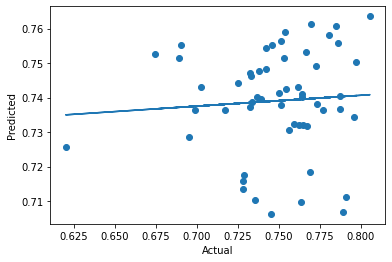

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

df = pd.read_csv("../../../data/input/suanfarma_train_data_rules_round_6.csv")
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

df = df[df.columns.drop(list(df.filter(regex="_100$")))]
df = df[df.columns.drop(list(df.filter(regex="_99$")))]
df = df[df.columns.drop(list(df.filter(regex="_98$")))]
df = df[df.columns.drop(list(df.filter(regex="_95$")))]
df = df[df.columns.drop(list(df.filter(regex="_0$")))]
df = df[df.columns.drop(list(df.filter(regex="_1$")))]
df = df[df.columns.drop(list(df.filter(regex="_2$")))]
df = df[df.columns.drop(list(df.filter(regex="_5$")))]
df = df[df.columns.drop(list(df.filter(regex="_std")))]
df = df[df.columns.drop(list(df.filter(regex="_min")))]
df = df[df.columns.drop(list(df.filter(regex="_max")))]
df = df[df.columns.drop(list(df.filter(regex="_mean")))]
df = df[df.columns.drop(list(df.filter(regex="_75%")))]
df = df[df.columns.drop(list(df.filter(regex="_25%")))]
df = df[df.columns.drop(list(df.filter(regex="_50%")))]
df = df[df.columns.drop(list(df.filter(regex="306TI")))]
df = df[df.columns.drop(list(df.filter(regex="306LI")))]
df = df[df.columns.drop(list(df.filter(regex="101LI")))]
cols = sorted(df.columns)
if "result" in cols:
    cols.remove("result")
if "index" in cols:
    cols.remove("index")
for sensor in set(map(lambda x: x[:-3], cols)):
    for i in range(90, 10, -10):
        df[f"{sensor}_{i}__{sensor}_{i-10}"] = (
            df[f"{sensor}_{i}"] - df[f"{sensor}_{i-10}"]
        )


# df = udf.eliminate_corr(df, thresh=0.7)

df_test = df.sample(frac=0.6, random_state=0)
df_train = pd.concat([df, df_test]).drop_duplicates(keep=False)
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)
print(len(df_train), len(df_test))

## conduct smogn
df_train = smogn.smoter(
    data=df_train,
    y="result",
    # k = 10,                    ## positive integer (k < n)
    samp_method="extreme",  ## string ('balance' or 'extreme'
    drop_na_col=True,  ## boolean (True or False)
    drop_na_row=True,  ## boolean (True or False)
    rel_thres=0.90,  ## positive real number (0 < R < 1)
)
print(len(df_train))

X_train = df_train.drop(["result"], axis=1)
y_train = df_train["result"].ravel()
X_test = df_test.drop(["result"], axis=1)
y_test = df_test["result"].ravel()

regr = RandomForestRegressor(random_state=0, n_estimators=45, oob_score=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print("y test Values:", y_test.round(6))
print("y pred Values:", y_pred.round(6))
print("Full Process Modelling")
print("r_score", r2_score(y_test, y_pred))
print("Random Forest MSError", np.mean((y_pred - y_test) ** 2))

importances = regr.feature_importances_
forest_importances = pd.DataFrame(pd.Series(importances, index=X_train.columns.values))
forest_importances.reset_index(inplace=True)
forest_importances.columns = ["Feature", "FE_Value"]
forest_importances = forest_importances.sort_values("FE_Value", ascending=False)[:15]
df_forest_importances = pd.DataFrame()
df_forest_importances[["Sensor", "IDK"]] = forest_importances["Feature"].str.split(
    "_", 1, expand=True
)
df_best_features = df_forest_importances[["Sensor"]]
forest_importances["Sensor"] = df_best_features
print(forest_importances)


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
# regression line
y_test, y_predicted = y_test.reshape(-1, 1), y_pred.reshape(-1, 1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test))
plt.show()


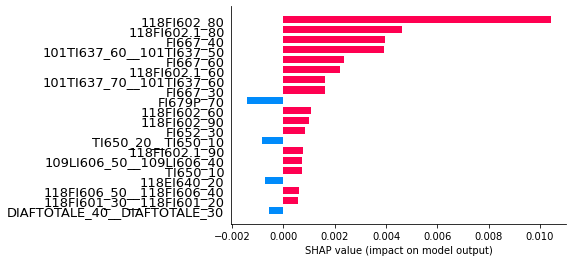

In [3]:
import shap

shap.initjs()

expl = shap.Explainer(regr, X_train)

shap.bar_plot(
    expl.shap_values(X_test.iloc[0]), feature_names=X_train.columns, max_display=20
)


In [4]:
shap.force_plot(
    expl.expected_value,
    expl.shap_values(X_test.iloc[0]),
    feature_names=X_train.columns,
)


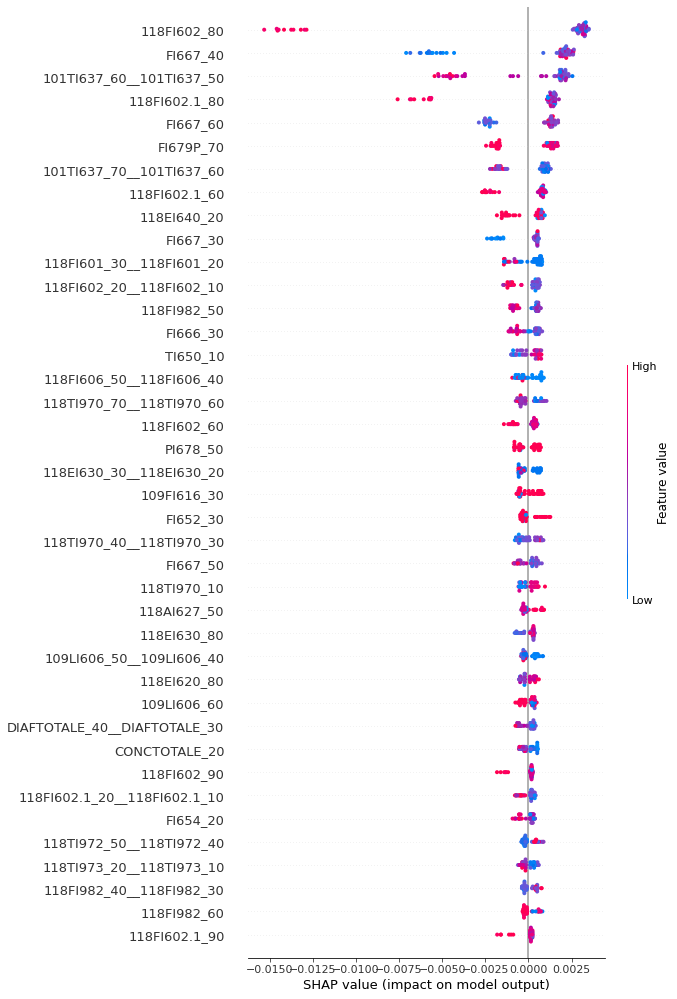

In [5]:
expl = shap.Explainer(regr, X_test)

shap.summary_plot(
    expl.shap_values(X_test),
    features=X_test,
    feature_names=X_test.columns,
    max_display=40,
)


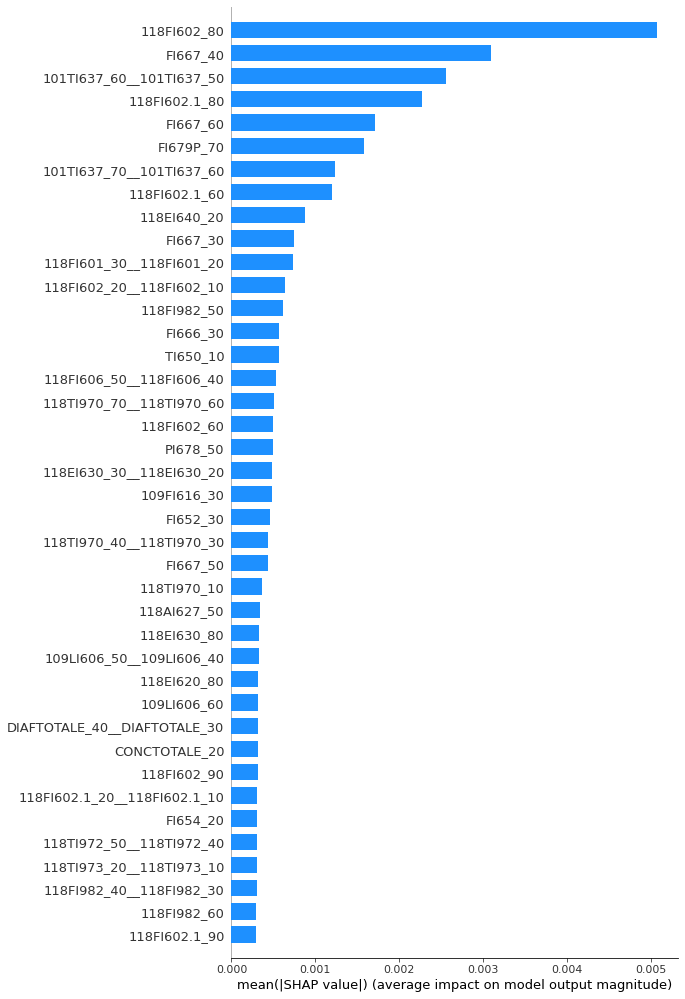

In [6]:
shap.summary_plot(
    expl.shap_values(X_test),
    feature_names=X_test.columns,
    plot_type="bar",
    color="dodgerblue",
    max_display=40,
)


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
synth_matrix: 100%|##########| 4/4 [00:13<00:00,  3.35s/it]
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


y test Values: [0.795917 0.738855 0.797273 0.728224 0.735573 0.761986 0.762214 0.694928
 0.674692 0.722995 0.706465 0.728726 0.763869 0.787628 0.777815 0.698975
 0.717378 0.750224 0.769276 0.738927 0.744529 0.762984 0.75598  0.738137
 0.73236  0.698774 0.767121 0.751262 0.738917 0.668388 0.776947 0.751314
 0.731539 0.745263 0.732442 0.72792  0.793545 0.709416 0.763551 0.690905
 0.619862 0.789397 0.790759 0.773325 0.802097 0.764365 0.739714 0.757546
 0.733379 0.725297 0.702676 0.754128 0.740721 0.766614 0.764263 0.736855
 0.78597  0.729074 0.764762 0.753655 0.74227  0.787162 0.740607 0.753165
 0.729733 0.752038 0.785081 0.712901 0.725136 0.756932 0.757752 0.751144
 0.774452 0.735281 0.772566 0.745981 0.689195 0.690366 0.763583 0.732733
 0.759326 0.74223  0.805662 0.711897 0.784648 0.769883 0.765773 0.780696
 0.770969 0.728959 0.747496 0.764846 0.619228 0.619605 0.620391 0.619924
 0.619811 0.619408 0.619932 0.619885 0.619952 0.620337 0.619391 0.619202
 0.619333 0.61873  0.620061 0.619738

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


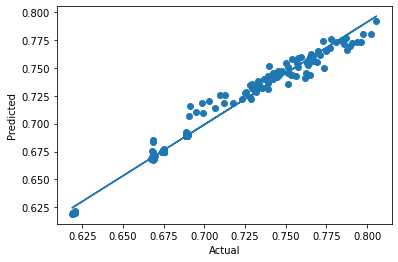

In [7]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import r2_score
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

df = pd.read_csv("../../../data/input/suanfarma_train_data_rules_round_6.csv")
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

df = df[df.columns.drop(list(df.filter(regex="_100$")))]
df = df[df.columns.drop(list(df.filter(regex=".1_$")))]
df = df[df.columns.drop(list(df.filter(regex="_99$")))]
df = df[df.columns.drop(list(df.filter(regex="_98$")))]
df = df[df.columns.drop(list(df.filter(regex="_95$")))]
df = df[df.columns.drop(list(df.filter(regex="_0$")))]
df = df[df.columns.drop(list(df.filter(regex="_1$")))]
df = df[df.columns.drop(list(df.filter(regex="_2$")))]
df = df[df.columns.drop(list(df.filter(regex="_5$")))]
df = df[df.columns.drop(list(df.filter(regex="_std")))]
df = df[df.columns.drop(list(df.filter(regex="_min")))]
df = df[df.columns.drop(list(df.filter(regex="_max")))]
df = df[df.columns.drop(list(df.filter(regex="_mean")))]
df = df[df.columns.drop(list(df.filter(regex="_75%")))]
df = df[df.columns.drop(list(df.filter(regex="_25%")))]
df = df[df.columns.drop(list(df.filter(regex="_50%")))]
df = df[df.columns.drop(list(df.filter(regex="306TI")))]
df = df[df.columns.drop(list(df.filter(regex="306LI")))]
df = df[df.columns.drop(list(df.filter(regex="101LI")))]
cols = sorted(df.columns)
if "result" in cols:
    cols.remove("result")
if "index" in cols:
    cols.remove("index")
for sensor in set(map(lambda x: x[:-3], cols)):
    for i in range(90, 10, -10):
        df[f"{sensor}_{i}__{sensor}_{i-10}"] = (
            df[f"{sensor}_{i}"] - df[f"{sensor}_{i-10}"]
        )


# df = udf.eliminate_corr(df, thresh=0.7)


## conduct smogn
df = smogn.smoter(
    data=df,
    y="result",
    k=5,  ## positive integer (k < n)
    samp_method="extreme",  ## string ('balance' or 'extreme'
    drop_na_col=True,  ## boolean (True or False)
    drop_na_row=True,  ## boolean (True or False)
    rel_thres=0.90,  ## positive real number (0 < R < 1)
)
df.reset_index(inplace=True)

X = df.drop(["result"], axis=1)
y = df["result"].ravel()

regr = RandomForestRegressor(random_state=0, n_estimators=45, oob_score=True)
regr.fit(X, y)
y_pred = regr.predict(X)
print("y test Values:", y.round(6))
print("y pred Values:", y_pred.round(6))
print("Full Process Modelling")
print("r_score", r2_score(y, y_pred))
print("Random Forest MSError", np.mean((y_pred - y) ** 2))

importances = regr.feature_importances_
forest_importances = pd.DataFrame(pd.Series(importances, index=X.columns.values))
forest_importances.reset_index(inplace=True)
forest_importances.columns = ["Feature", "FE_Value"]
forest_importances = forest_importances.sort_values("FE_Value", ascending=False)[:15]
df_forest_importances = pd.DataFrame()
df_forest_importances[["Sensor", "IDK"]] = forest_importances["Feature"].str.split(
    "_", 1, expand=True
)
df_best_features = df_forest_importances[["Sensor"]]
forest_importances["Sensor"] = df_best_features
print(forest_importances)

fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
# regression line
y, y_predicted = y.reshape(-1, 1), y_pred.reshape(-1, 1)
ax.plot(y, LinearRegression().fit(y, y_pred).predict(y))
plt.show()


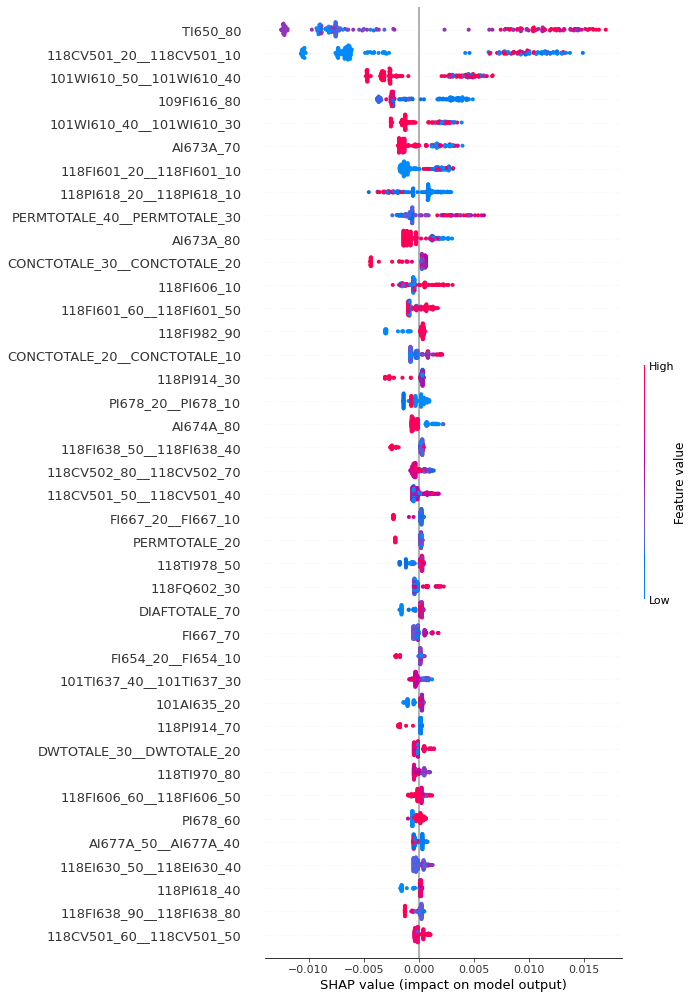

In [8]:
expl = shap.Explainer(regr, X)

shap.summary_plot(
    expl.shap_values(X),
    features=X,
    feature_names=X.columns,
    max_display=40,
)
